In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os


In [2]:
main_dir = "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs/"
model_list_all = ['simpleAE', 'simpleVAE',
                  'priorVAE', 'beta_simpleVAE',  'beta_priorVAE']
model_list_trim = ['simpleVAE', 'priorVAE', 'beta_simpleVAE',  'beta_priorVAE']

main_dir_new = '/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/no_early_stopping_500_epochs_new_sigma_mu/'
pdf_dir = 'criterion_pdf'


path_new = os.path.join(main_dir_new, pdf_dir)
os.makedirs(path_new, exist_ok=True)


In [3]:
loss_dic = {}
kl_dic = {}
recon_dic = {}

In [4]:
for model in model_list_all:
    tem1 = pd.read_csv(main_dir + model +
                       '_results/recon_kl_loss_' + model + '.csv', index_col=0)
    tem2 = pd.read_csv(main_dir + model +
                       '_results/training_test_loss_' + model + '.csv', index_col=0)  
    if model in model_list_trim:
        loss_dic[model] = math.log10(tem2.iloc[499, 1])
        kl_dic[model] = math.log10(tem1.iloc[499,3])
        recon_dic[model] = math.log10(tem1.iloc[499, 1])
    else:
        recon_dic[model] = math.log10(tem2.iloc[499, 1])
    



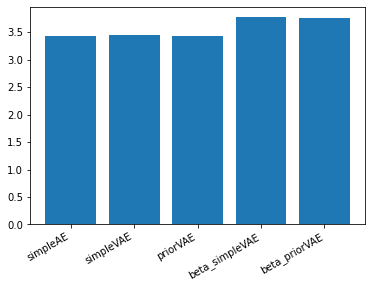

In [5]:
plt.bar(*zip(*recon_dic.items()))
plt.xticks(rotation=30, ha='right')
plt.savefig(main_dir_new + pdf_dir + '/' + 'reconstruction_loss_plot.pdf')
plt.show()


In [6]:
print(str(recon_dic))


{'simpleAE': 3.4272575923604536, 'simpleVAE': 3.4441627479419235, 'priorVAE': 3.4406732301430516, 'beta_simpleVAE': 3.770829899586315, 'beta_priorVAE': 3.7589278686141805}


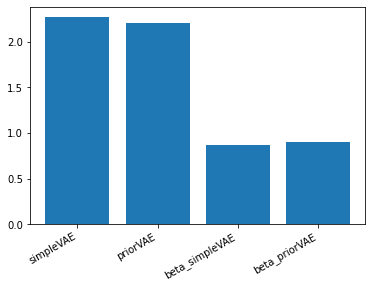

In [7]:
plt.bar(*zip(*kl_dic.items()))
plt.xticks(rotation=30, ha='right')
plt.savefig(main_dir_new + pdf_dir + '/' + 'kl_loss_plot.pdf')
plt.show()


In [8]:
print(str(kl_dic))


{'simpleVAE': 2.2660005802767826, 'priorVAE': 2.204808821929152, 'beta_simpleVAE': 0.8684811396364231, 'beta_priorVAE': 0.9058722839360908}


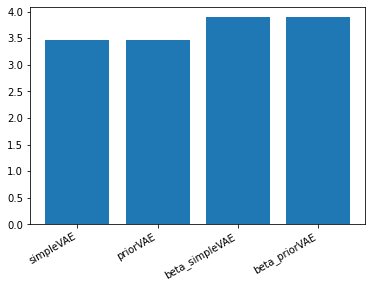

In [9]:
plt.bar(*zip(*loss_dic.items()))
plt.xticks(rotation=30, ha='right')
plt.savefig(main_dir_new + pdf_dir + '/' + 'total_loss_plot.pdf')
plt.show()


In [10]:
print(str(loss_dic))

{'simpleVAE': 3.472062329480123, 'priorVAE': 3.465197713757557, 'beta_simpleVAE': 3.889105809351581, 'beta_priorVAE': 3.889473438229726}


In [11]:
new_main = "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs/correlation/"

In [12]:
correlation_dic = {}

In [13]:
for model in model_list_all:
    tem_res = np.load(new_main + "gene level + " + model + "_correlation_partial.npy")
    sel_cor = []
    for i in range(20):
        sel_cor.append(tem_res[i, (20+i)])
    correlation_dic[model] = np.mean(sel_cor)
    

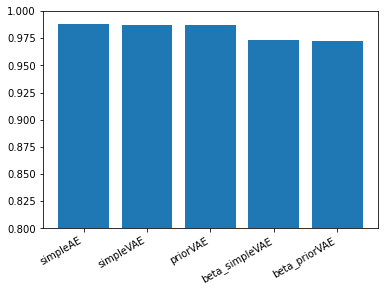

In [14]:
plt.bar(*zip(*correlation_dic.items()))
plt.xticks(rotation=30, ha='right')
plt.ylim([0.8, 1])
plt.savefig(main_dir_new + pdf_dir + '/' + 'correlation_score_plot.pdf')
plt.show()


In [15]:
print(str(correlation_dic))

{'simpleAE': 0.9876403422044581, 'simpleVAE': 0.9872568612792361, 'priorVAE': 0.9875231380167715, 'beta_simpleVAE': 0.9732542904661077, 'beta_priorVAE': 0.972238663032913}


In [16]:
score_df = pd.read_csv("/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/beta_finetune/Silhouette_score/organ_latent_result_test_set_silhouette_scores.csv", index_col=0)
score_default = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/no_early_stopping_500_epochs_new_sigma_mu/Silhouette_score/organ_latent_result_test_set_silhouette_scores.csv", index_col=0)


In [17]:
beta_models = ['beta_simpleVAE', 'beta_priorVAE']


In [18]:
score_default.head()

,0
community level + simpleAE,0.071180
community level + beta_simpleVAE,-0.122807
community level + priorVAE,0.054333
community level + simpleVAE,0.081625
community level + beta_priorVAE,-0.000254


In [19]:
tem1.head

<bound method NDFrame.head of       recon_train    recon_test    kl_train   kl_test
0    98287.242443  18867.515384  220.969565  7.473480
1    18954.389167  18737.426265    4.359616  3.090270
2    18775.819957  18639.528032    2.994296  2.664609
3    18343.418268  17852.766550    2.952404  3.372904
4    16458.495195  15825.448915    4.623450  4.628588
..            ...           ...         ...       ...
495   5749.686381   5755.640877    8.035156  8.013709
496   5745.833182   5737.624843    8.039388  8.047181
497   5745.130586   5743.124238    8.035676  8.047594
498   5743.247824   5794.323982    8.045423  8.020998
499   5747.263220   5740.211159    8.042449  8.051416

[500 rows x 4 columns]>

In [20]:
model_all = ['simpleAE', 'simpleVAE', 'priorVAE',
             'beta_simpleVAE', 'beta_priorVAE']


beta_simpleVAE


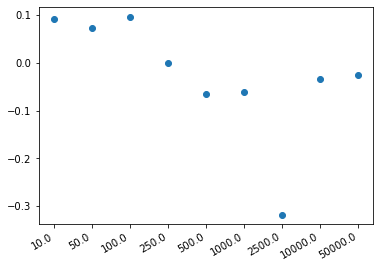

beta_priorVAE


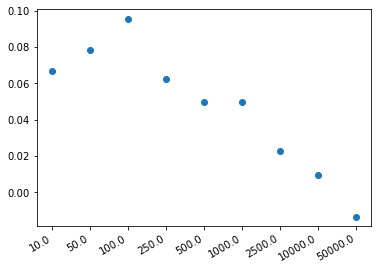

In [21]:
for i in beta_models:
    compare_str = 'gene level + ' + i
    tem1 = score_df[score_df.Model_type == i]
    tem2 = score_default[score_default.index == compare_str]
    df_sum = tem1[['Beta_value', 'Organ_silhouette_score']]
    tem2_new = {'Beta_value': 250, 'Organ_silhouette_score': tem2.iloc[0, 0]}
    df_sum = df_sum.append(tem2_new,  ignore_index=True).reset_index(drop=True)
    df_sum = df_sum.sort_values('Beta_value')
    print(i)
    plt.scatter(df_sum['Beta_value'].astype('string'),
            df_sum['Organ_silhouette_score'].astype('float'))
    plt.xticks(rotation=30, ha='right')
    plt.show()


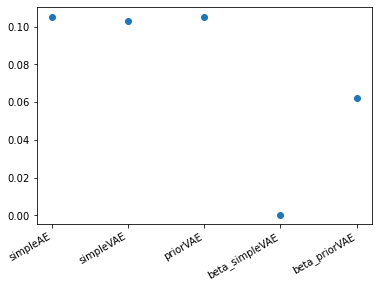

In [22]:
score_list = []

for i in model_all:
    compare_str = 'gene level + ' + i
    tem2 = score_default[score_default.index == compare_str]
    score_list.append(tem2.values[0][0])

plt.scatter(model_all, score_list)
plt.xticks(rotation=30, ha='right')
plt.savefig(main_dir_new + pdf_dir + '/' + 'model_type_silhouette_plot.pdf')
plt.show()


In [23]:
model_all = ['simpleAE', 'simpleVAE', 'priorVAE', 'beta_simpleVAE', 'beta_priorVAE']

In [24]:
score_df = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/beta_finetune/Silhouette_score/organ_latent_result_test_set_silhouette_scores_PCA_downstream.csv", index_col=0)
score_default = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/no_early_stopping_500_epochs_new_sigma_mu/Silhouette_score/organ_latent_result_test_set_silhouette_scores_PCA_downstream.csv", index_col=0)


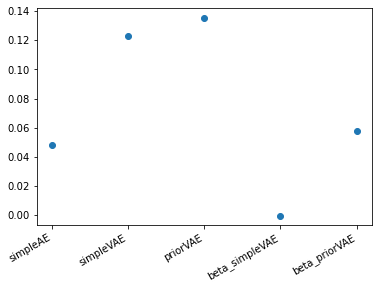

In [25]:
score_list = []

for i in model_all:
    compare_str = 'gene level + ' + i
    tem2 = score_default[score_default.index == compare_str]
    score_list.append(tem2.values[0][0])

plt.scatter(model_all, score_list)
plt.xticks(rotation=30, ha='right')
plt.show()


beta_simpleVAE


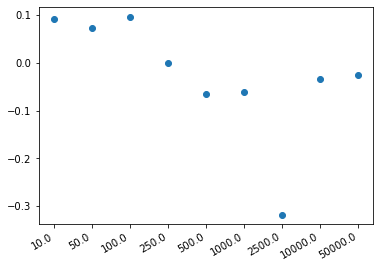

beta_priorVAE


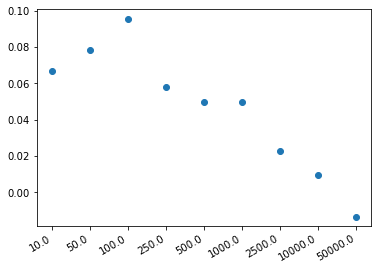

In [26]:
for i in beta_models:
    compare_str = 'gene level + ' + i
    tem1 = score_df[score_df.Model_type == i]
    tem2 = score_default[score_default.index == compare_str]
    df_sum = tem1[['Beta_value', 'Organ_silhouette_score']]
    tem2_new = {'Beta_value': 250, 'Organ_silhouette_score': tem2.iloc[0, 0]}
    df_sum = df_sum.append(tem2_new,  ignore_index=True).reset_index(drop=True)
    df_sum = df_sum.sort_values('Beta_value')
    print(i)
    plt.scatter(df_sum['Beta_value'].astype('string'),
                df_sum['Organ_silhouette_score'].astype('float'))
    plt.xticks(rotation=30, ha='right')
    plt.show()


In [27]:
annotate_tem = pd.read_excel(
    "/mnt/dzl_bioinf/binliu/EMBL_ExpressionArray/arrayExpress_annotation.xlsx")


In [28]:
score_df = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/beta_finetune/Silhouette_score/organ_latent_result_test_set_silhouette_scores_PCA_downstream_healthy_only.csv", index_col=0)
score_default = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/no_early_stopping_500_epochs_new_sigma_mu/Silhouette_score/organ_latent_result_test_set_silhouette_scores_PCA_downstream_healthy_only.csv", index_col=0)


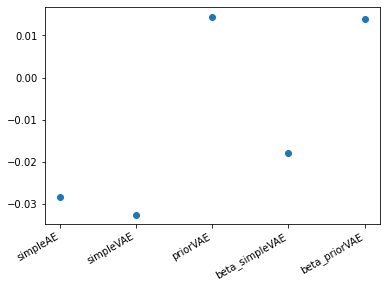

In [29]:
score_list = []

for i in model_all:
    compare_str = 'gene level + ' + i
    tem2 = score_default[score_default.index == compare_str]
    score_list.append(tem2.values[0][0])

plt.scatter(model_all, score_list)
plt.xticks(rotation=30, ha='right')
plt.show()


beta_simpleVAE


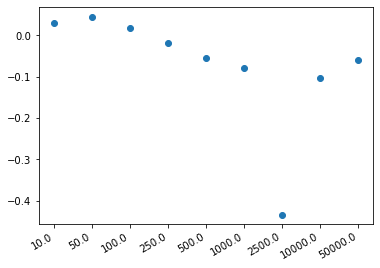

beta_priorVAE


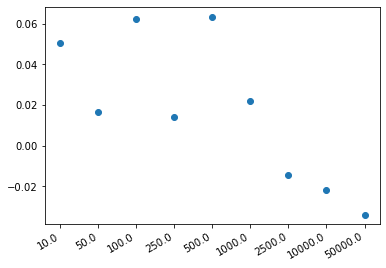

In [30]:
for i in beta_models:
    compare_str = 'gene level + ' + i
    tem1 = score_df[score_df.Model_type == i]
    tem2 = score_default[score_default.index == compare_str]
    df_sum = tem1[['Beta_value', 'Organ_silhouette_score']]
    tem2_new = {'Beta_value': 250, 'Organ_silhouette_score': tem2.iloc[0, 0]}
    df_sum = df_sum.append(tem2_new,  ignore_index=True).reset_index(drop=True)
    df_sum = df_sum.sort_values('Beta_value')
    print(i)
    plt.scatter(df_sum['Beta_value'].astype('string'),
                df_sum['Organ_silhouette_score'].astype('float'))
    plt.xticks(rotation=30, ha='right')
    plt.show()
